In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt  

In [2]:
def rms(tv,b):
    err = 0
    for i in range(1,nstates+1):
        err += np.power((tv[i]-b[i]),2)
    return np.sqrt(err/nstates)

# method 1

In [24]:
nstates = 19
nalpha = np.arange(0,1.1,0.1)
nsteps = [1,2,3,5,8,15,30,60,100,200,1000]
runs = 100
gamma = 1
start = (nstates+1)//2
episodes = 10
tv = np.arange(-20, 22, 2) / 20.0
tv[0] = 0
tv[20] = 0

In [27]:
def td(n,alpha):
    rms_error = np.zeros([episodes])
    for r in range(runs):
        value = np.zeros([21])
        for ep in range(episodes):
            reward = [0]
            state = [start]
            s = start
            time = 0
            end = 0
            endtime = float('inf')
            while True:  
                time += 1                
                if end == 0:
                    a = random.randint(0,1)
                    if a == 1:
                        t = s + 1
                    else:
                        t = s - 1
                    if t == 0:
                        reward.append(-1)
                    elif t == 20:
                        reward.append(1)
                    else:
                        reward.append(0)
                    state.append(t)
                    if t == 0 or t == 20:
                        end = 1
                        endtime = time
                
                UpdateTime = time - n
                if UpdateTime >= 0:
                    returns = 0
                    for i in range(1,n+1):
                        if UpdateTime + i < len(reward):
                            returns += pow( gamma , i-1 ) * reward [ UpdateTime + i ]
                        else:
                            break
                    if UpdateTime + n < len(state):
                        returns += pow( gamma , n ) * value [ state [ UpdateTime + n ] ]
                    UpdateState = state[UpdateTime]
                    if UpdateState != 0 and UpdateState != 20:
                        value[UpdateState] += alpha * (returns - value[UpdateState])
                if UpdateTime == endtime - 1:
                    break
                s = t
            rms_error[ep] += rms( tv , value )
    rms_error /= runs
    rms_mean = np.mean(rms_error)
    if rms_mean > 0.55:
        rms_mean = 0.55
    return rms_mean

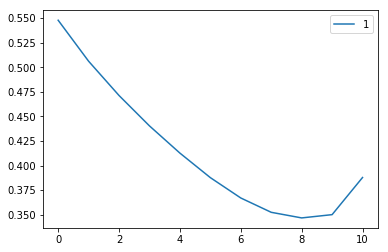

In [28]:
i = 1
rms_avg = []
for x in nalpha:
    rms_avg.append(td(i,x))
plt.plot(rms_avg,label=str(i))
plt.legend()
plt.show()

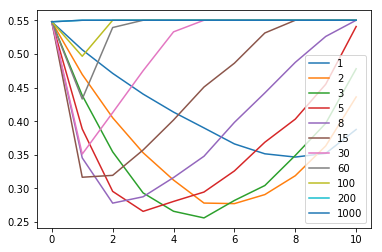

In [29]:
for i in nsteps:
    rms_avg = []
    for x in nalpha:
        rms_avg.append(td(i,x))
    plt.plot(rms_avg,label=str(i))
plt.legend()
plt.show()


# method 2

In [30]:
def td(n,alpha):
    rms_error = np.zeros([episodes])
    for r in range(runs):
        value = np.zeros([21])
        for ep in range(episodes):
            reward = [0]
            state = [start]
            s = start
            time = 0
            end = 0
            while True:  
                time += 1                
                if end == 0:
                    a = random.randint(0,1)
                    if a == 1:
                        t = s + 1
                    else:
                        t = s - 1
                    if t == 0:
                        reward.append(-1)
                    elif t == 20:
                        reward.append(1)
                    else:
                        reward.append(0)
                    state.append(t)
                    if t == 0 or t == 20:
                        end = 1
                
                if time > n:
                    returns = 0
                    for i in range(1,n+1):
                        if i < len(reward):
                            returns += pow( gamma , i-1 ) * reward [ i ]
                        else:
                            break
                    if n < len(state):
                        returns += pow( gamma , n ) * value [ state [ n ] ]
                    UpdateState = state[0]
                    if UpdateState != 0 and UpdateState != 20:
                        value[UpdateState] += alpha * (returns - value[UpdateState])
                    state.pop(0)
                    reward.pop(0)
                if state[0]==0 or state[0]==20:
                    break
                s = t
            rms_error[ep] += rms( tv , value )
    rms_error /= runs
    rms_mean = np.mean(rms_error)
    if rms_mean > 0.55:
        rms_mean = 0.55
    return rms_mean

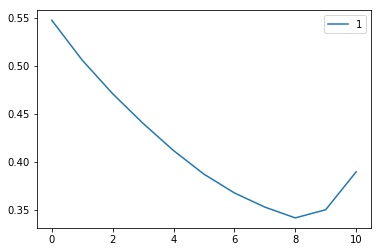

In [31]:
nstates = 19
nalpha = np.arange(0,1.1,0.1)
nsteps = [1,2,3,5,8,15,30,60,100,200,1000]
runs = 100
gamma = 1
start = (nstates+1)//2
episodes = 10
tv = np.arange(-20, 22, 2) / 20.0
tv[0] = 0
tv[20] = 0

i = 1
rms_avg = []
for x in nalpha:
    rms_avg.append(td(i,x))
plt.plot(rms_avg,label=str(i))
plt.legend()
plt.show()

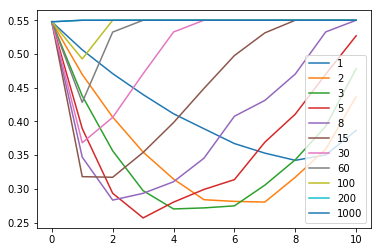

In [32]:
for i in nsteps:
    rms_avg = []
    for x in nalpha:
        rms_avg.append(td(i,x))
    plt.plot(rms_avg,label=str(i))
plt.legend()
plt.show()